<a href="https://colab.research.google.com/github/raaj1v/Deep-Learning/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install swifter

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [ ]:
try:
    import chardet
    import os
    import pandas as  pd
    import spacy
    
    import seaborn as sns
    import string

    from tqdm import tqdm
    from textblob import TextBlob
    
    from nltk.corpus import stopwords
    import nltk
    from nltk.stem import WordNetLemmatizer
    from nltk import word_tokenize
    import re
    
    
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import LabelEncoder
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.feature_extraction.text import TfidfTransformer
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.pipeline import Pipeline
    
    
    from sklearn.preprocessing import FunctionTransformer
    from sklearn.base import BaseEstimator, TransformerMixin
    from sklearn.pipeline import FeatureUnion
    from sklearn.feature_extraction import DictVectorizer
    
    import swifter
    
    tqdm.pandas()
except Exception as e:
    print("Error : {} ".format(e))

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
with open('tenderMaster.csv', 'rb') as f:
    result = chardet.detect(f.read())   
encoding = result['encoding']    
df = pd.read_csv('tenderMaster.csv', encoding=encoding)
df['category'].value_counts().plot( kind='bar', figsize=(15,10))
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
wordnet = WordNetLemmatizer()
def black_text(token):
    return token not in stopwords and token not in list(string.punctuation) and len(token)>2 
#FUNCTION TO PRE-PROCESS TEXT FOR WORDS NOT IN BLACK TEXT
def clean_txt(text):
    clean_text =[]
    clean_text2 =[]
    text =re.sub("'","",text)
    text =re.sub("(\\d\\w)+"," ", text)
    clean_text =[wordnet.lemmatize(word,pos="v") for word in word_tokenize(text.lower()) if black_text(word)]
    clean_text2 =[word for word in clean_text if black_text(word)] 
    return " ".join(clean_text2)    
def polarity_txt(text):
    return TextBlob(text).sentiment[0]

def subjectivity_txt(text):
    return TextBlob(text).sentiment[1]

def len_txt(text):
    if len(text.split()>0):
        return len(set(clean_txt(text).split()))/len(text.split())
    else:
        return 0    
import nltk
from nltk.corpus import stopwords

df['text'] = df['tenderTitle'] + " " + df['shortDescription']

stop_words = set(stopwords.words('english'))

df['text'] = df['text'].swifter.apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

df['polarity'] = df['text'].swifter.apply(polarity_txt)
df['subjectivity'] = df['text'].swifter.apply(subjectivity_txt)
df['len'] = df['text'].swifter.apply(lambda x: len(x))   
#storing text, polarity, subjectivuty, len into a new dataframe X
X = df[['text', 'polarity', 'subjectivity', 'len']]

#storing category into a new dataframe y
y  = df['category']

#encoding  the categories(y) using fit_transform method
encoder = LabelEncoder()
y = encoder.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, stratify=y)
v = dict(zip(list(y), df['category'].to_list()))

from sklearn.pipeline import Pipeline

text_clf = Pipeline([
        ('vect', CountVectorizer(analyzer='word', stop_words = "english")),
        ('tfidf', TfidfTransformer(use_idf=True)),
        ('clf', MultinomialNB(alpha = 0.01))
])

import numpy as np
X_TEST = x_test['text'].to_list()
Y_TEST = list(y_test)


text_clf.fit(x_train['text'].tolist(), y_train)
predicted = text_clf.predict(X_TEST)

c = 0

for doc, category in zip(X_TEST, predicted):
    
    if c == 2:break
    
    print("-"*55)
    print(doc)
    print(v[category])
    print("-"*55)

    c = c + 1 
    
np.mean(predicted == Y_TEST)    

[nltk_data] Downloading package punkt to /home/repl/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/repl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/repl/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/repl/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /home/repl/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
docs_new = ['Auction Sale of Rolling Stock (null) - Cond Emu Coaches with Iron, Steel, Wooden Scrap and Non-ferrous. 1. 369b Icf Mc 2. 360b Icf Mc 3. 354b Icf Mc 4. 312b Icf Mc 5. 303b Icf Mc 6. 305b Icf Mc Restricted Items 1. Complete Wheel Set with Axle, Gear Wheel, Axle Box with Roller Bearing Msu Bearing and Cover Complete Equal to 24 Sets. 2. Schaku Coupler Draw Bar Complete Equal to 12 Nos. Remark 1. All the Coaches Are Lying at Kurla Carshed and Will Be Placed at Cutting Line Before Handing Over. 2.approach Road is Available Upto Lot. 3. R/items After Cutting to Be Handed Over to Stock Holder By the Purchaser and Same to Be Kept Near Line No. 31 Be Road. If Not, Delivery of Last Truck of the Lot Will Be Held Up. 4. Railway Track and Surrounding Areas to Be Cleared By the Purchaser Before Completion of Delivery I.e.,rexine, Pvc. Wood. Sun Mica, Frp Window, Plastic, Rubber Etc. If Not Cleared, Delivery of Last Truck of the Lot and Completion Report Will Be Held Up. 5. Lot is Ok for Sale on as is Where is Basis. Note live Line of Ohe Power 25000 Volt to Be Disconnected at the Time of Cutting and Dismantling of Above Coaches. Location All the Coaches Are Lying at Kurla Carshed. Stock Holder Sr. Dee Trs Cla Carshed']

predicted = text_clf.predict(docs_new)
v[predicted[0]]

**ENCODING IDENTIFICATION**


In [ ]:
with open('tenderMaster.csv', 'rb') as f:
    result = chardet.detect(f.read())    

In [ ]:
encoding = result['encoding']

**RE-READ THE CSV USING DETECTED ENCODING**

In [ ]:
df = pd.read_csv('tenderMaster.csv', encoding=encoding)

**HEATMAP GENERATION**

<AxesSubplot: >

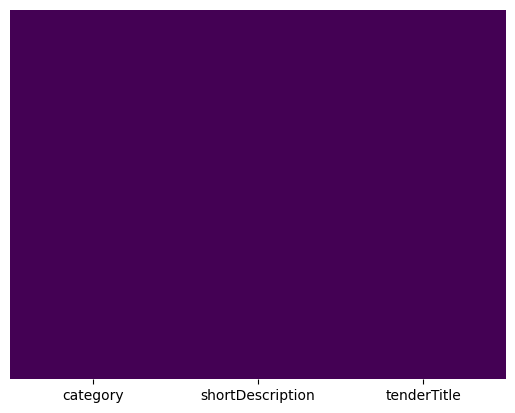

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot: >

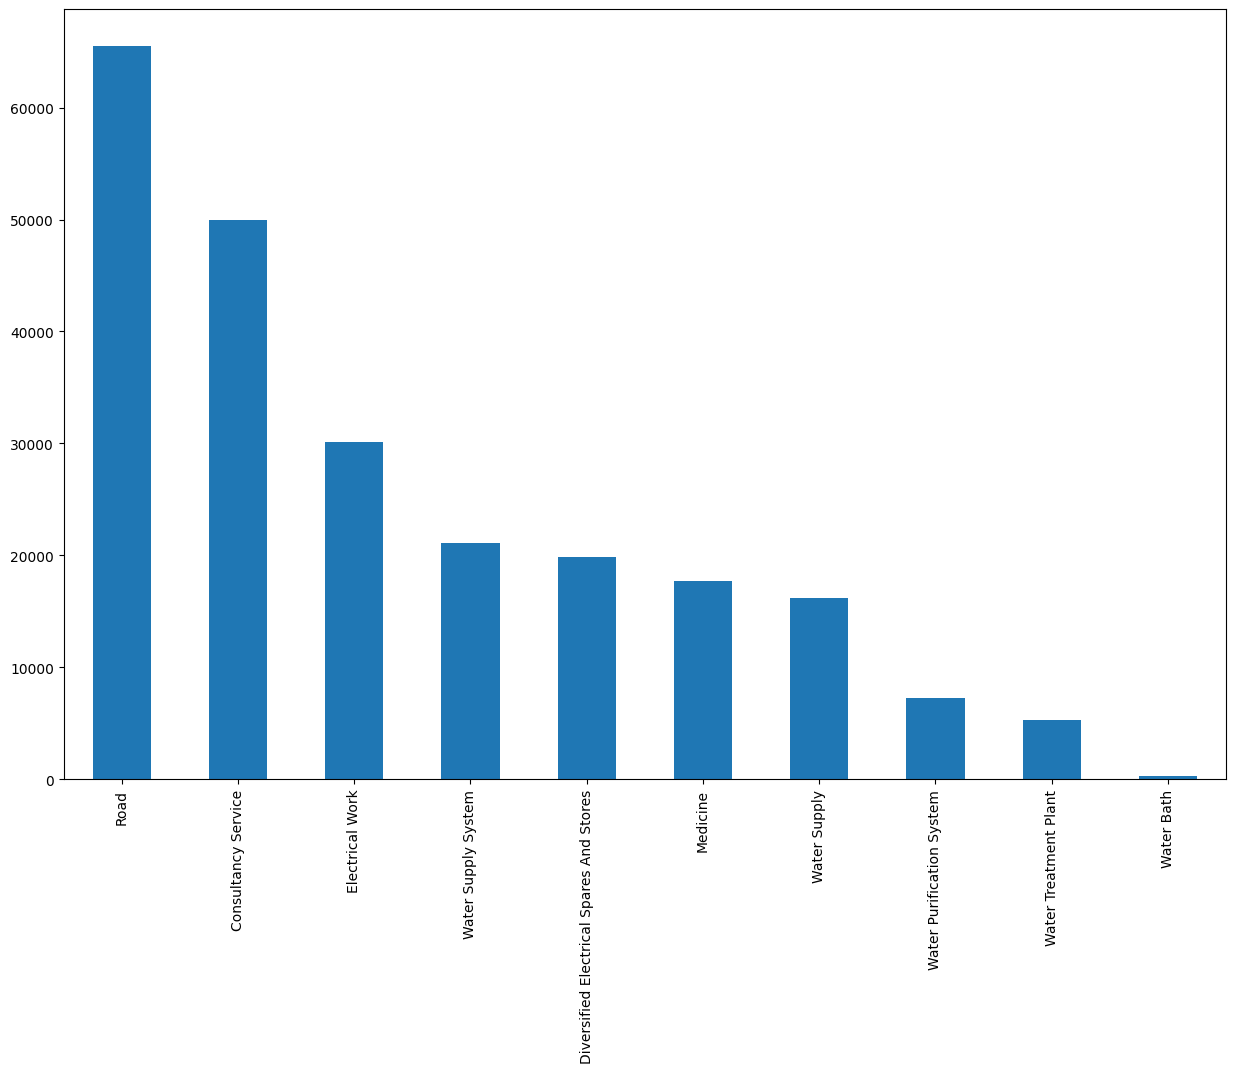

In [ ]:
df['category'].value_counts().plot( kind='bar', figsize=(15,10))


In [ ]:
df.columns

Index(['category', 'shortDescription', 'tenderTitle'], dtype='object')

In [ ]:
df.describe()

category  ...                           tenderTitle
count    233209  ...                                233209
unique       10  ...                                 31880
top        Road  ...  Public Health Engineering Department
freq      65535  ...                                 19397

[4 rows x 3 columns]

In [ ]:
df.isna().sum()

category            0
shortDescription    0
tenderTitle         0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.category.unique()

array(['Electrical Work', 'Diversified Electrical Spares And Stores',
       'Consultancy Service', 'Medicine', 'Road', 'Water Supply',
       'Water Purification System', 'Water Treatment Plant',
       'Water Supply System', 'Water Bath'], dtype=object)

**TEXT PRE-PROCESSING**
1. Remove STOPWORDS
2. Applying Lower-case Letters
3. TEXT LEMMATIZATION

In [ ]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
wordnet = WordNetLemmatizer()

In [ ]:
def black_text(token):
    return token not in stopwords and token not in list(string.punctuation) and len(token)>2 

In [ ]:
#FUNCTION TO PRE-PROCESS TEXT FOR WORDS NOT IN BLACK TEXT
def clean_txt(text):
    clean_text =[]
    clean_text2 =[]
    text =re.sub("'","",text)
    text =re.sub("(\\d\\w)+"," ", text)
    clean_text =[wordnet.lemmatize(word,pos="v") for word in word_tokenize(text.lower()) if black_text(word)]
    clean_text2 =[word for word in clean_text if black_text(word)] 
    return " ".join(clean_text2)

**DEFINING TEXT SENTIMENTS FOR SUBJECTIVITY, POLARITY, AND LEN**

In [ ]:
def polarity_txt(text):
    return TextBlob(text).sentiment[0]

def subjectivity_txt(text):
    return TextBlob(text).sentiment[1]

def len_txt(text):
    if len(text.split()>0):
        return len(set(clean_txt(text).split()))/len(text.split())
    else:
        return 0

In [ ]:
import nltk
from nltk.corpus import stopwords

df['text'] = df['tenderTitle'] + " " + df['shortDescription']

stop_words = set(stopwords.words('english'))

df['text'] = df['text'].swifter.apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

df['polarity'] = df['text'].swifter.apply(polarity_txt)
df['subjectivity'] = df['text'].swifter.apply(subjectivity_txt)
df['len'] = df['text'].swifter.apply(lambda x: len(x))

Pandas Apply:   0%|          | 0/233209 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/233209 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/233209 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/233209 [00:00<?, ?it/s]

In [ ]:
df

category  ...  len
0                                Electrical Work  ...  121
1       Diversified Electrical Spares And Stores  ...  118
2                                Electrical Work  ...  138
3       Diversified Electrical Spares And Stores  ...  627
4                                Electrical Work  ...  123
...                                          ...  ...  ...
233204                       Water Supply System  ...  163
233205                       Water Supply System  ...  188
233206                       Water Supply System  ...  207
233207                 Water Purification System  ...   86
233208                       Water Supply System  ...  686

[233209 rows x 7 columns]

In [ ]:
#storing text, polarity, subjectivuty, len into a new dataframe X
X = df[['text', 'polarity', 'subjectivity', 'len']]

#storing category into a new dataframe y
y  = df['category']

#encoding  the categories(y) using fit_transform method
encoder = LabelEncoder()
y = encoder.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, stratify=y)
v = dict(zip(list(y), df['category'].to_list()))


In [ ]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([
        ('vect', CountVectorizer(analyzer='word', stop_words = "english")),
        ('tfidf', TfidfTransformer(use_idf=True)),
        ('clf', MultinomialNB(alpha = 0.01))
])

In [ ]:
import numpy as np

In [ ]:
X_TEST = x_test['text'].to_list()
Y_TEST = list(y_test)

In [ ]:
text_clf.fit(x_train['text'].tolist(), y_train)
predicted = text_clf.predict(X_TEST)

In [ ]:
c = 0

for doc, category in zip(X_TEST, predicted):
    
    if c == 2:break
    
    print("-"*55)
    print(doc)
    print(v[category])
    print("-"*55)

    c = c + 1 

-------------------------------------------------------
AUTRES ORGANISMES Framework Agreement Relating Training Services Benefit Onisep Agents
Consultancy Service
-------------------------------------------------------
-------------------------------------------------------
Zilla Parishad Construction dhalai road purba bhogali meer najrul house jamirgachi bazar bhogali l gp bhangore-ii block.
Road
-------------------------------------------------------


In [ ]:
np.mean(predicted == Y_TEST)

0.7485549628664048

In [ ]:
docs_new = ['Auction Sale of Rolling Stock (null) - Cond Emu Coaches with Iron, Steel, Wooden Scrap and Non-ferrous. 1. 369b Icf Mc 2. 360b Icf Mc 3. 354b Icf Mc 4. 312b Icf Mc 5. 303b Icf Mc 6. 305b Icf Mc Restricted Items 1. Complete Wheel Set with Axle, Gear Wheel, Axle Box with Roller Bearing Msu Bearing and Cover Complete Equal to 24 Sets. 2. Schaku Coupler Draw Bar Complete Equal to 12 Nos. Remark 1. All the Coaches Are Lying at Kurla Carshed and Will Be Placed at Cutting Line Before Handing Over. 2.approach Road is Available Upto Lot. 3. R/items After Cutting to Be Handed Over to Stock Holder By the Purchaser and Same to Be Kept Near Line No. 31 Be Road. If Not, Delivery of Last Truck of the Lot Will Be Held Up. 4. Railway Track and Surrounding Areas to Be Cleared By the Purchaser Before Completion of Delivery I.e.,rexine, Pvc. Wood. Sun Mica, Frp Window, Plastic, Rubber Etc. If Not Cleared, Delivery of Last Truck of the Lot and Completion Report Will Be Held Up. 5. Lot is Ok for Sale on as is Where is Basis. Note live Line of Ohe Power 25000 Volt to Be Disconnected at the Time of Cutting and Dismantling of Above Coaches. Location All the Coaches Are Lying at Kurla Carshed. Stock Holder Sr. Dee Trs Cla Carshed']

In [ ]:
predicted = text_clf.predict(docs_new)
v[predicted[0]]

'Diversified Electrical Spares And Stores'

In [ ]:
df

category  ...  len
0                                Electrical Work  ...  121
1       Diversified Electrical Spares And Stores  ...  118
2                                Electrical Work  ...  138
3       Diversified Electrical Spares And Stores  ...  627
4                                Electrical Work  ...  123
...                                          ...  ...  ...
233204                       Water Supply System  ...  163
233205                       Water Supply System  ...  188
233206                       Water Supply System  ...  207
233207                 Water Purification System  ...   86
233208                       Water Supply System  ...  686

[233209 rows x 7 columns]